In [8]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        graph = filename.split('_')[0]
        algorithm = filename.split('_')[1]
        content = json.load(f)
        content['id'] = graph
        content['algorithm'] = algorithm
        results.append(content)

results = pd.DataFrame(results, columns=['id', 'initializationTime', 'executionTime', 'totalTime', 'algorithm'])
results

,id,initializationTime,executionTime,totalTime,algorithm
0,graph2,0.000004,0.000004,0.000009,serial


<BarContainer object of 2 artists>

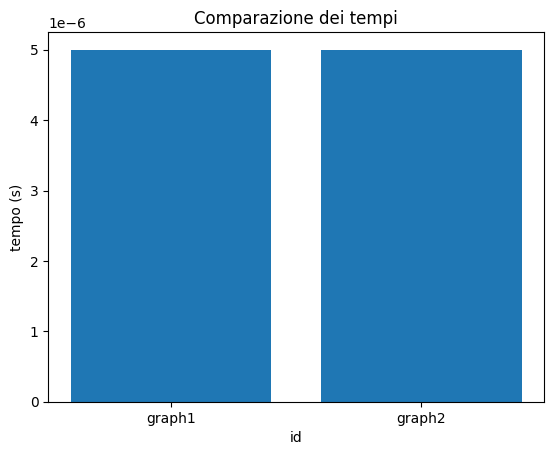

In [5]:
plt.title('Comparazione dei tempi di inizializzazione')
plt.xlabel('id')
plt.ylabel('tempo (s)')
plt.bar(results['id'], results['initializationTime'], label='initializationTime')

<BarContainer object of 2 artists>

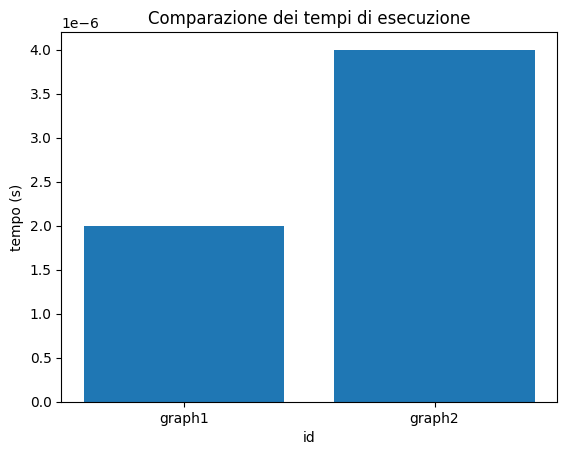

In [6]:
plt.title('Comparazione dei tempi di esecuzione')
plt.xlabel('id')
plt.ylabel('tempo (s)')
plt.bar(results['id'], results['executionTime'], label='executionTime')

<BarContainer object of 2 artists>

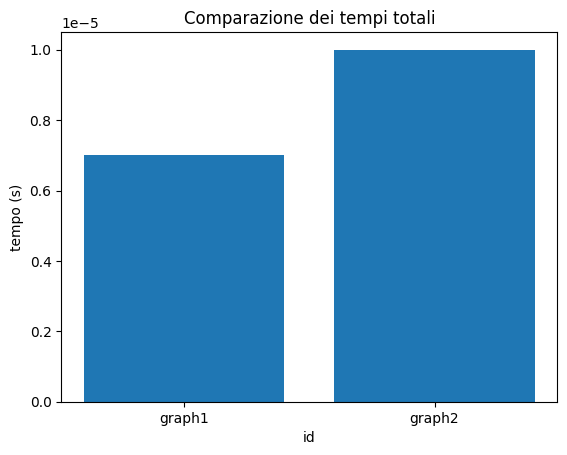

In [7]:
plt.title('Comparazione dei tempi totali')
plt.xlabel('id')
plt.ylabel('tempo (s)')
plt.bar(results['id'], results['totalTime'], label='totalTime')